# Programming Assignment 1
 * CSCI-5930 ML Spring 2019 
* Author: Kushal Ganti 

## Tasks for everyone (Tasks 1-15)

### TASK 1: Import all the necessary packages here


In [830]:
import pandas as pd 
import numpy as np
import scipy as stats
import seaborn as sns
from matplotlib import pyplot as plt 
#import matplotlib.pyplot as plt
import random 
from sklearn.model_selection import train_test_split

from sklearn import preprocessing




### TASK 2: Load the dataset into memory so that you can play with it here

In [831]:
df_dataset = pd.read_csv('C:/Users/kusha/Desktop/sem2/ML/programming assignment/new/baby-weights-dataset2.csv')
#print (df_dataset)
print(df_dataset.shape)
print(df_dataset.head())





(101400, 37)
     ID  SEX  MARITAL  FAGE  GAINED  VISITS  MAGE  FEDUC  MEDUC  TOTALP  \
0  2001    2        1    33      26      10    34     12      4       2   
1  2002    2        2    19      40      10    18     11     12       1   
2  2003    2        1    33      16      14    31     16     16       2   
3  2004    1        1    25      40      15    28     12     12       3   
4  2005    1        2    21      60      13    20     12     14       2   

    ...     HYPERCH  HYPERPR  ECLAMP  CERVIX  PINFANT  PRETERM RENAL RHSEN  \
0   ...           0        0       0       0        0        0     0     0   
1   ...           0        0       0       0        0        0     0     0   
2   ...           0        0       0       0        0        0     0     0   
3   ...           0        0       0       0        0        0     0     0   
4   ...           0        1       0       0        0        0     0     0   

   UTERINE  BWEIGHT  
0        0   4.3750  
1        0   6.9375  
2

### TASK 3: Compute mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)

In [832]:

#calculate mean

Mean = np.mean(df_dataset['BWEIGHT'])
#cal min
Min = np.min(df_dataset['BWEIGHT'])
#cal max
Max = np.max(df_dataset['BWEIGHT'])
#cal standard deviation
Stdev= np.std(df_dataset['BWEIGHT'])
#cal median
Median = np.median(df_dataset['BWEIGHT'])
#25%
b= np.percentile(df_dataset['BWEIGHT'],25)
# 75%
c= np.percentile(df_dataset['BWEIGHT'],75)

print ("Mean=" , Mean )
print ("Min=", Min)
print ("Max=" ,Max)
print ("Stdev= " , Stdev)
print ("Median=", Median)
print ("25%percentile" , b)
print ("75%percentile" , c)











Mean= 7.2580658284023665
Min= 0.1875
Max= 13.0625
Stdev=  1.3294541253577947
Median= 7.375
25%percentile 6.625
75%percentile 8.0625


### TASK 4: Also, draw the histogram plot for the BWEIGHT variable


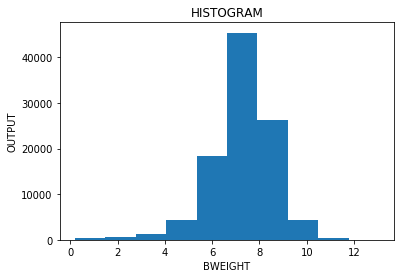

In [833]:

plt.xlabel('BWEIGHT')
plt.ylabel('OUTPUT')
plt.title("HISTOGRAM")
 #plt.ylabel("YAXIS")
plt.hist(df_dataset['BWEIGHT'])
plt.show()





### TASK 5: Present the skewness and kurtosis of the BWEIGHT target variable

C:\Users\kusha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: -0.936593
Kurtosis: 2.868780


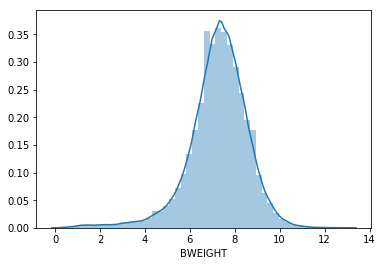

In [834]:
sns.distplot(df_dataset['BWEIGHT']);

print("Skewness: %f" % df_dataset['BWEIGHT'].skew())
print("Kurtosis: %f" % df_dataset['BWEIGHT'].kurt())






### TASK 6: Do variable selection from the pool of 124 variables based on correlation score with the target variable BWEIGHT 
### Please report all the variables you kept for training.

49
                 ID       SEX   MARITAL      FAGE    GAINED    VISITS  \
ID         1.000000 -0.002444 -0.000799 -0.000815 -0.004517 -0.001223   
SEX       -0.002444  1.000000 -0.000217 -0.001383 -0.029824  0.000475   
MARITAL   -0.000799 -0.000217  1.000000 -0.326817  0.004582 -0.164554   
FAGE      -0.000815 -0.001383 -0.326817  1.000000 -0.055416  0.100619   
GAINED    -0.004517 -0.029824  0.004582 -0.055416  1.000000  0.091973   
VISITS    -0.001223  0.000475 -0.164554  0.100619  0.091973  1.000000   
MAGE       0.002728 -0.004593 -0.400774  0.750074 -0.062252  0.138458   
FEDUC      0.002352 -0.000193 -0.358460  0.282474  0.107655  0.209027   
MEDUC      0.001940  0.000966 -0.371508  0.272225  0.107535  0.230714   
TOTALP     0.003152 -0.006945 -0.056250  0.282043 -0.123318 -0.058236   
BDEAD      0.001949 -0.003890 -0.004599  0.040859 -0.015823 -0.000124   
TERMS      0.004128 -0.006555 -0.014833  0.126696 -0.012694  0.032781   
LOUTCOME  -0.005958  0.004687  0.098247 -0.25593

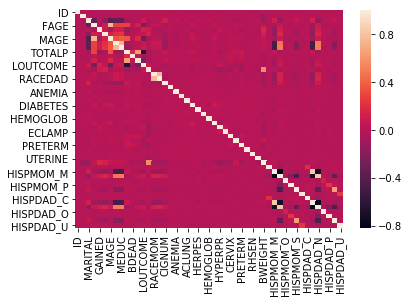

In [835]:
# creating dimmy variable 
df_dummydataset=pd.get_dummies(df_dataset)

#Correlation data 
df_corrdata = df_dummydataset.corr()
ax = sns.heatmap(df_corrdata)

print(len(df_corrdata))
print(df_corrdata)
c= df_corrdata.iloc[-1,:]
#print(a)
d= sorted(a, reverse=True)
#print(b)
df_NewDataSet = df_dataset[['BWEIGHT','WEEKS','GAINED','VISITS','MAGE']]
#print(df_NewDataSet)

#df_NewDataSet.boxplot()


### TASK 7: Check for missing data, and apply a "good" strategy to tackle it

In [836]:
#to find null data set
df_dataset.isnull().sum()
df_dataset.isnull()


# there is no empty/missing data and hence we get value 0 for isnull().sum() and false for isnull() 

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK 8: Tackle the dummy categorical variables by introducing dummy variables

In [837]:
# done as part of task 6
#df_dummydataset=pd.get_dummies(df_dataset)

### TASK 9.1: Randomly split the dataset into training, Tr (80%) and testing, Te (20%)

In [838]:

print(len(df_NewDataSet))
#print(df_NewDataSet)
from sklearn.model_selection import train_test_split

#print(data)
df_split =df_NewDataSet
#train_test_split will randomly split the data 
test , train =train_test_split(df_split,test_size=0.8) 
print(len(train))
print(len(test))
print(train)
test

x=train[['WEEKS', 'GAINED','VISITS','MAGE']]
y=train[['BWEIGHT']]
x_test=test[['WEEKS', 'GAINED','VISITS','MAGE']]
y_test=test[['BWEIGHT']]



101400
81120
20280
       BWEIGHT  WEEKS  GAINED  VISITS  MAGE
53750   7.3125     39      15       9    37
49819   6.2500     38      28      10    25
41158   6.6250     38      60      11    24
45378   7.8750     40      47      13    34
2100    7.1250     39      45      12    27
41882   6.2500     41       0      16    27
34675   7.6875     40      35      12    19
87163   7.6875     41      31      13    31
78615   7.2500     40      44      12    21
89927   6.8125     39      21      12    26
73162   6.9375     36      31      11    27
12369   9.5000     41      34       8    28
53405   6.1875     38      20      13    20
91544   6.4375     39      26      16    32
98804   6.8750     40       0      12    30
17723   7.6875     37      20       3    36
33336   9.3750     39      50      11    20
21679   6.3750     30      53      15    21
13691   6.6250     36      25       9    34
71640   7.8125     42      22      15    35
19090   6.5000     41      31      13    31
47036   6.500

In [839]:

#standard scalar will normalise the data set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaled_test = scaler1.fit_transform(x_test)
#print(scaled_test)
scaled_train_x = pd.DataFrame(scaler.fit_transform(x) , columns=x.columns )
scaled_train_x.head()
#other = '1'
#scaled_train_x1 = pd.DataFrame.append( other,ignore_index=False, verify_integrity=False, sort=None)
# adding the bias x0
scaled_train_x['x0'] =1
scaled_train_x.head()

C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,WEEKS,GAINED,VISITS,MAGE,x0
0,0.105513,-1.123651,-0.924555,1.555990,1
1,-0.294078,-0.167737,-0.656109,-0.459465,1
2,-0.294078,2.185280,-0.387662,-0.627420,1
3,0.505105,1.229367,0.149231,1.052126,1
4,0.105513,1.082303,-0.119216,-0.123556,1


### TASK 9.3: Apply the training data statistics to normalize the testing data as well.

In [840]:
#similar to training data set we apply the same to test data set
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
#scaled_test = scaler1.fit_transform(x_test)

#print(scaled_test)
scaled_test_x = pd.DataFrame(scaler1.fit_transform(x_test) , columns=x_test.columns )
scaled_test_x['x0'] =1
scaled_test_x.head()
# cols=scaled_test.index
# print(cols)

C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,WEEKS,GAINED,VISITS,MAGE,x0
0,0.503336,-0.313679,-0.643306,-0.626215,1
1,-0.291870,-1.702746,0.692277,-0.291247,1
2,-0.689473,1.075387,2.027860,2.723464,1
3,0.503336,-0.021244,1.493627,-1.463635,1
4,-4.665503,-0.386788,-0.109073,0.546173,1


### TASK 10: Find the linear regression function describing the training dataset using a technique you recently learned in class.  CLOSED-FORM vs. Gradient Descent (batch or stochastic or mini-batch).
###          PLEASE DO NOT CALL ANY LIBRARY FUNCTION THAT MIGHT DO THE TASK FOR YOU. If you do, you are most likely get a ZERO for this assignment.

In [841]:
print('hello')

# cal (X.T .X)
M = scaled_train_x.T.dot(scaled_train_x)
print(M)

hello
               WEEKS        GAINED        VISITS          MAGE            x0
WEEKS   8.112000e+04  7.943727e+03  1.093032e+04 -4.301308e+03 -3.764100e-11
GAINED  7.943727e+03  8.112000e+04  7.420702e+03 -4.983363e+03  2.476463e-12
VISITS  1.093032e+04  7.420702e+03  8.112000e+04  1.097761e+04  1.083400e-11
MAGE   -4.301308e+03 -4.983363e+03  1.097761e+04  8.112000e+04  3.934630e-12
x0     -3.704370e-11  3.562928e-12  1.040235e-11  3.794298e-12  8.112000e+04


In [842]:
M.shape

(5, 5)

In [843]:
#Cal inverse of (x.T)X
Minv = np.linalg.pinv(M)
Minv

array([[ 1.27068116e-05, -1.03400954e-06, -1.73185655e-06,
         8.44609292e-07,  6.32141985e-21],
       [-1.03400954e-06,  1.25855525e-05, -1.12987661e-06,
         8.71229325e-07,  7.23677652e-21],
       [-1.73185655e-06, -1.12987661e-06,  1.29226016e-05,
        -1.90999875e-06, -1.04088165e-20],
       [ 8.44609292e-07,  8.71229325e-07, -1.90999875e-06,
         1.26841937e-05, -2.89913158e-21],
       [ 6.03059797e-21, -9.20824601e-22, -2.30901099e-21,
        -9.34653013e-25,  1.23274162e-05]])

In [844]:
#Checking the shape of the matrix
Minv.shape

(5, 5)

In [845]:
#Printing the value
Minv

array([[ 1.27068116e-05, -1.03400954e-06, -1.73185655e-06,
         8.44609292e-07,  6.32141985e-21],
       [-1.03400954e-06,  1.25855525e-05, -1.12987661e-06,
         8.71229325e-07,  7.23677652e-21],
       [-1.73185655e-06, -1.12987661e-06,  1.29226016e-05,
        -1.90999875e-06, -1.04088165e-20],
       [ 8.44609292e-07,  8.71229325e-07, -1.90999875e-06,
         1.26841937e-05, -2.89913158e-21],
       [ 6.03059797e-21, -9.20824601e-22, -2.30901099e-21,
        -9.34653013e-25,  1.23274162e-05]])

In [846]:
#Calculatimg our W value using linear reg formula
w =Minv.dot(scaled_train_x.T).dot(y)
print(w)

[[0.73447719]
 [0.16264285]
 [0.03386184]
 [0.1342808 ]
 [7.25735716]]


### Task 11: Predict BWEIGHT target variable for each of the testing dataset using the regression line you learned in Task 10, and report RMSE(testing) (Root Mean Squared Error)

ypred is               0
0      7.470156
1      6.750379
2      7.360235
3      7.477630
4      3.837391
5      7.964129
6      6.235033
7      6.681612
8      7.102120
9      7.489538
10     7.642310
11     7.739830
12     8.297977
13     7.192692
14     7.301758
15     7.171219
16     7.241196
17     6.596385
18     7.475380
19     7.502200
20     8.078903
21     6.948377
22     7.171482
23     7.489035
24     7.582150
25     7.428343
26     7.110194
27     7.309437
28     7.557077
29     8.146554
...         ...
20250  7.079512
20251  7.190531
20252  7.992566
20253  6.717114
20254  6.607346
20255  7.611348
20256  7.840308
20257  7.552871
20258  7.155899
20259  5.900476
20260  6.974576
20261  7.692204
20262  8.044669
20263  7.085659
20264  6.696756
20265  6.212922
20266  8.524156
20267  7.299100
20268  8.018165
20269  6.725038
20270  7.162099
20271  7.765278
20272  6.873679
20273  6.834729
20274  7.276429
20275  7.213027
20276  7.377158
20277  7.974412
20278  6.574496
20279  7.091333

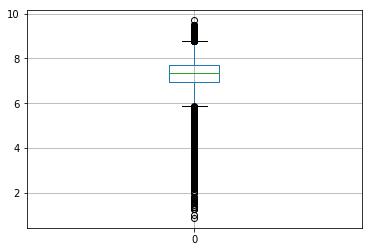

In [847]:

from sklearn.metrics import mean_squared_error
import math
#cal the predicted value
y_pred = (scaled_test_x).dot(w)
print("ypred is" ,y_pred)
#Calculating MSE
MSE = mean_squared_error(y_test,y_pred)
print("MSE is " , MSE)
#Calculating RMSE
RMSE = math.sqrt(MSE)
print("RMSE is ", RMSE )
y_pred.boxplot()


### Repeat TASK 10 additional four times : Run linear regression training again
### After each run, Report RMSE(testing)


In [848]:
#Run1 .. Running the whole process from splitting the data 80-20 , scalling and calculating w then MSE then RMSE 
from sklearn.model_selection import train_test_split
df_split1 = train
test1 , train1 =train_test_split(df_split1,test_size=0.8) 
x1=train1[['WEEKS', 'GAINED','VISITS','MAGE']]
y1=train1[['BWEIGHT']]
x1_test=test1[['WEEKS', 'GAINED','VISITS','MAGE']]
y1_test=test1[['BWEIGHT']]

from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaled_train1_x = pd.DataFrame(scaler.fit_transform(x1) , columns=x1.columns )
scaled_train1_x.head()

scaled_train1_x['x0'] =1
scaled_train1_x.head()
scaler3 = StandardScaler()
scaled_test1_x = pd.DataFrame(scaler3.fit_transform(x1_test), columns=x1_test.columns)
scaled_test1_x['x0'] =1
scaled_test1_x.head()

M1 = scaled_train1_x.T.dot(scaled_train1_x)
M1inv = np.linalg.pinv(M1)
w1 =M1inv.dot(scaled_train1_x.T).dot(y1)

from sklearn.metrics import mean_squared_error
import math

y1_pred = (scaled_test1_x).dot(w1)
MSE1 = mean_squared_error(y1_test,y1_pred)
print("MSE1 is " , MSE1)
RMSE1 = math.sqrt(MSE1)
print("RMSE1 is ", RMSE1 )


MSE1 is  1.171556637051285
RMSE1 is  1.0823846991949235


C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [849]:
#Run2 .. Running the whole process from splitting the data 80-20 , scalling and calculating w then MSE then RMSE 
from sklearn.model_selection import train_test_split
df_split2 = train1
test2 , train2 =train_test_split(df_split2,test_size=0.8) 
x2=train2[['WEEKS', 'GAINED','VISITS','MAGE']]
y2=train2[['BWEIGHT']]
x2_test=test2[['WEEKS', 'GAINED','VISITS','MAGE']]
y2_test=test2[['BWEIGHT']]

from sklearn.preprocessing import StandardScaler
scaler4 = StandardScaler()
scaled_train2_x = pd.DataFrame(scaler4.fit_transform(x2) , columns=x2.columns )
scaled_train2_x.head()

scaled_train2_x['x0'] =1
scaled_train2_x.head()
scaler5 = StandardScaler()
scaled_test2_x = pd.DataFrame(scaler5.fit_transform(x2_test), columns=x2_test.columns)
scaled_test2_x['x0'] =1
scaled_test2_x.head()

M2 = scaled_train2_x.T.dot(scaled_train2_x)
M2inv = np.linalg.pinv(M2)
w2 =M2inv.dot(scaled_train2_x.T).dot(y2)

from sklearn.metrics import mean_squared_error
import math

y2_pred = (scaled_test2_x).dot(w2)
MSE2 = mean_squared_error(y2_test,y2_pred)
print("MSE2 is " , MSE2)
RMSE2 = math.sqrt(MSE2)
print("RMSE2 is ", RMSE2 )


MSE2 is  1.154644144773977
RMSE2 is  1.0745436914216084


C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [850]:
#Run3 .. Running the whole process from splitting the data 80-20 , scalling and calculating w then MSE then RMSE 
from sklearn.model_selection import train_test_split
df_split3 = train2
test3 , train3 =train_test_split(df_split3,test_size=0.8) 
x3=train3[['WEEKS', 'GAINED','VISITS','MAGE']]
y3=train3[['BWEIGHT']]
x3_test=test3[['WEEKS', 'GAINED','VISITS','MAGE']]
y3_test=test3[['BWEIGHT']]

from sklearn.preprocessing import StandardScaler
scaler6 = StandardScaler()
scaled_train3_x = pd.DataFrame(scaler6.fit_transform(x3) , columns=x3.columns )
scaled_train3_x.head()

scaled_train3_x['x0'] =1
scaled_train3_x.head()
scaler7 = StandardScaler()
scaled_test3_x = pd.DataFrame(scaler7.fit_transform(x3_test), columns=x3_test.columns)
scaled_test3_x['x0'] =1
scaled_test3_x.head()

M3 = scaled_train3_x.T.dot(scaled_train3_x)
M3inv = np.linalg.pinv(M3)
w3 =M3inv.dot(scaled_train3_x.T).dot(y3)

from sklearn.metrics import mean_squared_error
import math

y3_pred = (scaled_test3_x).dot(w3)
MSE3 = mean_squared_error(y3_test,y3_pred)
print("MSE3 is " , MSE3)
RMSE3 = math.sqrt(MSE3)
print("RMSE3 is ", RMSE3)


MSE3 is  1.1483171309287088
RMSE3 is  1.071595600461624


C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [851]:
#Run4 .. Running the whole process from splitting the data 80-20 , scalling and calculating w then MSE then RMSE 
from sklearn.model_selection import train_test_split
df_split4 = train3
test4 , train4 =train_test_split(df_split4,test_size=0.8) 
x4=train4[['WEEKS', 'GAINED','VISITS','MAGE']]
y4=train4[['BWEIGHT']]
x4_test=test4[['WEEKS', 'GAINED','VISITS','MAGE']]
y4_test=test4[['BWEIGHT']]

from sklearn.preprocessing import StandardScaler
scaler8 = StandardScaler()
scaled_train4_x = pd.DataFrame(scaler8.fit_transform(x4) , columns=x4.columns )
scaled_train4_x.head()

scaled_train4_x['x0'] =1
scaled_train4_x.head()
scaler9 = StandardScaler()
scaled_test4_x = pd.DataFrame(scaler9.fit_transform(x4_test), columns=x4_test.columns)
scaled_test4_x['x0'] =1
scaled_test4_x.head()

M4 = scaled_train4_x.T.dot(scaled_train4_x)
M4inv = np.linalg.pinv(M4)
w4 =M4inv.dot(scaled_train4_x.T).dot(y4)

from sklearn.metrics import mean_squared_error
import math

y4_pred = (scaled_test4_x).dot(w4)
MSE4 = mean_squared_error(y4_test,y4_pred)
print("MSE4 is " , MSE4)
RMSE4 = math.sqrt(MSE4)
print("RMSE4 is ", RMSE4)


C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


MSE4 is  1.162879393470901
RMSE4 is  1.078368857799084


C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Task 12: Finally, Report RMSE(testing) = Average(RMSE_test) $\pm$ Stdev(RMSE_test)
### Here Average(RMSE_test) = average of all the 5 RMSE(testing) scores you got above.
### And, stdev(RMSE_test) = standard deviation of all the 5 RMSE(testing) scores above.

In [852]:
#cal RMSE avg
R1 = RMSE,RMSE1,RMSE2,RMSE3,RMSE4
RMSE_Ave = np.average(R1)
#cal RMSE stdev
RMSE_Stdev = np.std(R1)
print("Average RMSE" ,RMSE_Ave)
print("Standard Deviation is " ,RMSE_Stdev)
#RMSE_Final = RMSE_Ave +- RMSE_Stdev
#RMSE FInal cal
RMSE_FINAL = abs(RMSE_Ave) - abs(RMSE-Stdev)
print("RMSE final is" , RMSE_Final)


Average RMSE 1.0763023757837957
Standard Deviation is  0.0037241203928866334
RMSE final is 1.0737690442555394


### Task 13: Run linear regression one last time on the whole dataset  (i.e, training+testing which is preprocessed by you above).

In [853]:
#performing the whole process again on the data and finding RMSE
x5=df_dataset[['WEEKS', 'GAINED','VISITS','MAGE']]
y5=df_dataset[['BWEIGHT']]


from sklearn.preprocessing import StandardScaler
scaler10 = StandardScaler()
scaled_data_x = pd.DataFrame(scaler10.fit_transform(x5) , columns=x5.columns )


scaled_data_x['x0'] =1

M5 = scaled_data_x.T.dot(scaled_data_x)
M5inv = np.linalg.pinv(M5)
w5 =M3inv.dot(scaled_train3_x.T).dot(y3)

from sklearn.metrics import mean_squared_error
import math

y5_pred = (scaled_data_x).dot(w5)
MSE5 = mean_squared_error(y5,y5_pred)
print("MSE5 is " , MSE5)
RMSE5 = math.sqrt(MSE3)
print("RMSE5 is ", RMSE5)








C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


MSE5 is  1.1566603244806195
RMSE5 is  1.071595600461624


### Task 14: Preprocess the judge-without-label.csv file according টo the strategy you applied above on the whole dataset (task 13)

In [854]:
#Load Judge witout labels 
df_judge = pd.read_csv('C:/Users/kusha/Desktop/sem2/ML/programming assignment/new/judge-without-labels.csv')
print(df_judge.shape)
#Creating dummy variables
df_df=pd.get_dummies(df_judge)
print(list(df_df.columns))
#Selecting variables
df_Newjudge = df_df[['WEEKS','GAINED','VISITS','MAGE']]
#Normalisinig 
from sklearn.preprocessing import StandardScaler
scaler_a = StandardScaler()
scaled_judge_x = pd.DataFrame(scaler_a.fit_transform(df_Newjudge) , columns=df_Newjudge.columns )
#Adding Bias
scaled_judge_x['x0'] =1



(2001, 36)
['ID', 'SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'RACEMOM', 'RACEDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL', 'RHSEN', 'UTERINE', 'HISPMOM_M', 'HISPMOM_N', 'HISPMOM_O', 'HISPMOM_P', 'HISPMOM_S', 'HISPDAD_C', 'HISPDAD_M', 'HISPDAD_N', 'HISPDAD_O', 'HISPDAD_P', 'HISPDAD_S', 'HISPDAD_U']


C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Task 15: Predict BWEIGHT for each of the samples from the judge-without-label.csv file, and save the results in judge-submission-run-1.csv in the format below. Please change the run number and report what changes you have made in a corresponding file run-1.txt.

In [855]:
#Predicting the BWEIGHT
y_judge= (scaled_judge_x).dot(w)
y_jud =pd.DataFrame(y_judge)

y_jud.columns =['BWEIGHT']
#print(y_judge)
df_id = df_df[['ID']]
df_id['BWEIGHT']= y_jud.BWEIGHT.values


header =['ID', 'BWEIGHT']
print(df_id)
#Copying it to the CSV file
df_id.to_csv("judge-submission-run-5.csv" , columns = header , index = False)
#np.savetxt("judge-submission-run-2.csv", y_judge)





        ID   BWEIGHT
0        0  6.861970
1        1  7.771261
2        2  7.086132
3        3  7.101974
4        4  7.100973
5        5  7.432190
6        6  6.606312
7        7  7.020134
8        8  8.073950
9        9  6.794155
10      10  7.924461
11      11  7.310363
12      12  7.609299
13      13  7.175766
14      14  5.240404
15      15  6.754299
16      16  7.396077
17      17  7.288279
18      18  6.262598
19      19  7.723824
20      20  7.472983
21      21  7.366459
22      22  7.770556
23      23  7.534723
24      24  7.034483
25      25  8.057737
26      26  6.904589
27      27  7.170489
28      28  7.398936
29      29  7.633402
...    ...       ...
1971  1971  7.094092
1972  1972  7.179941
1973  1973  7.463479
1974  1974  7.638809
1975  1975  6.333215
1976  1976  6.938821
1977  1977  8.306901
1978  1978  6.185548
1979  1979  7.442531
1980  1980  7.202168
1981  1981  7.449051
1982  1982  7.420222
1983  1983  7.347277
1984  1984  7.185835
1985  1985  6.552929
1986  1986  7

C:\Users\kusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Tasks only for CSCI-5930 (Grad) students

### Task 16: Repeat tasks 9-12 three times, and report the ultimate RMSE_test average $\pm$ ultimate RMSE_test stdev

In [856]:
#Run1 .. Running the whole process from splitting the data 80-20 , scalling and calculating w then MSE then RMSE 

from sklearn.model_selection import train_test_split
df_split11 = train4
test11 , train11 =train_test_split(df_split11,test_size=0.8) 
x11=train11[['WEEKS', 'GAINED','VISITS','MAGE']]
y11=train11[['BWEIGHT']]
x11_test=test11[['WEEKS', 'GAINED','VISITS','MAGE']]
y11_test=test11[['BWEIGHT']]

from sklearn.preprocessing import StandardScaler
scaler11 = StandardScaler()
scaled_train11_x = pd.DataFrame(scaler11.fit_transform(x11) , columns=x11.columns )
scaled_train11_x.head()

scaled_train11_x['x0'] =1
scaled_train11_x.head()
scaler12 = StandardScaler()
scaled_test11_x = pd.DataFrame(scaler12.fit_transform(x11_test), columns=x11_test.columns)
scaled_test11_x['x0'] =1
scaled_test11_x.head()

M11 = scaled_train11_x.T.dot(scaled_train11_x)
M11inv = np.linalg.pinv(M11)
w11 =M11inv.dot(scaled_train11_x.T).dot(y11)

from sklearn.metrics import mean_squared_error
import math

y11_pred = (scaled_test11_x).dot(w11)
MSE11 = mean_squared_error(y11_test,y11_pred)
print("MSE11 is " , MSE11)
RMSE11 = math.sqrt(MSE11)
print("RMSE11 is ", RMSE11)





MSE11 is  1.1496738502853727
RMSE11 is  1.072228450604335


C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [857]:
##Run2 .. Running the whole process from splitting the data 80-20 , scalling and calculating w then MSE then RMSE 
from sklearn.model_selection import train_test_split
df_split12 = train11
test12 , train12 =train_test_split(df_split12,test_size=0.8) 
x12=train12[['WEEKS', 'GAINED','VISITS','MAGE']]
y12=train12[['BWEIGHT']]
x12_test=test12[['WEEKS', 'GAINED','VISITS','MAGE']]
y12_test=test12[['BWEIGHT']]

from sklearn.preprocessing import StandardScaler
scaler13 = StandardScaler()
scaled_train12_x = pd.DataFrame(scaler13.fit_transform(x12) , columns=x12.columns )
scaled_train12_x.head()

scaled_train12_x['x0'] =1
scaled_train12_x.head()
scaler14 = StandardScaler()
scaled_test12_x = pd.DataFrame(scaler14.fit_transform(x12_test), columns=x12_test.columns)
scaled_test12_x['x0'] =1
scaled_test12_x.head()

M12 = scaled_train12_x.T.dot(scaled_train12_x)
M12inv = np.linalg.pinv(M12)
w12 =M12inv.dot(scaled_train12_x.T).dot(y12)

from sklearn.metrics import mean_squared_error
import math

y12_pred = (scaled_test12_x).dot(w12)
MSE12 = mean_squared_error(y12_test,y12_pred)
print("MSE12 is " , MSE12)
RMSE12 = math.sqrt(MSE12)
print("RMSE12 is ", RMSE12)

MSE12 is  1.1564363014388073
RMSE12 is  1.0753772833005202


C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [858]:
#RUN3 .. Running the whole process from splitting the data 80-20 , scalling and calculating w then MSE then RMSE 
from sklearn.model_selection import train_test_split
df_split13 = train12
test13 , train13 =train_test_split(df_split13,test_size=0.8) 
x13=train13[['WEEKS', 'GAINED','VISITS','MAGE']]
y13=train13[['BWEIGHT']]
x13_test=test13[['WEEKS', 'GAINED','VISITS','MAGE']]
y13_test=test13[['BWEIGHT']]

from sklearn.preprocessing import StandardScaler
scaler15 = StandardScaler()
scaled_train13_x = pd.DataFrame(scaler15.fit_transform(x13) , columns=x13.columns )
scaled_train13_x.head()

scaled_train13_x['x0'] =1
scaled_train13_x.head()
scaler16 = StandardScaler()
scaled_test13_x = pd.DataFrame(scaler14.fit_transform(x13_test), columns=x13_test.columns)
scaled_test13_x['x0'] =1
scaled_test13_x.head()

M13 = scaled_train13_x.T.dot(scaled_train13_x)
M13inv = np.linalg.pinv(M13)
w13 =M13inv.dot(scaled_train13_x.T).dot(y13)

from sklearn.metrics import mean_squared_error
import math

y13_pred = (scaled_test13_x).dot(w13)
MSE13 = mean_squared_error(y13_test,y13_pred)
print("MSE13 is " , MSE13)
RMSE13 = math.sqrt(MSE13)
print("RMSE13 is ", RMSE13)

C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


MSE13 is  1.07975646219675
RMSE13 is  1.0391133057548392


C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kusha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [859]:
#Finding the ultimate RMSE
R2 = RMSE,RMSE1,RMSE2,RMSE3,RMSE4,RMSE11,RMSE12,RMSE13
#Average RMSE
RMSE_Ultimate_Ave = np.average(R2)
#RMSE standard deviation
RMSE_Ultimate_Stdev = np.std(R2)
print("Average Ultimate RMSE" ,RMSE_Ultimate_Ave)
print("Standard Ultimate Deviation is " ,RMSE_Ultimate_Stdev)
#Calculating ultimate absolute value of RMSE
RMSE_Ultimate = abs(RMSE_Ultimate_Ave) - abs(RMSE_Ultimate_Stdev)
print("RMSE ultimate is" , RMSE_Ultimate)

Average Ultimate RMSE 1.0710288648223343
Standard Ultimate Deviation is  0.012486721010274367
RMSE ultimate is 1.05854214381206


### Task 17: Make an entry in the Kaggle challenge [https://www.kaggle.com/c/csci-ml-s19-pa1/] by joining and submitting the judge-submission-run1.csv file, and please report your Kaggle handle here too.
### There is limit of 5 entries each day untile the deadline.
### For each of the runs you submit, please report here the RMSE you got (as reported by the Kaggle platform).

In [860]:


#kushal ganti 
#score was 1.08918


